# Importación de Paquetes

In [38]:
import numpy as np
import math
import pandas as pd
import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks 
from sklearn import decomposition

!pip install mne
import mne as mne

In [39]:
#Clono el repositorio de GitHub en Colab

#Path para correr desde Github
!git clone https://github.com/mglucini/tpDMCyT
dirname = '/content/tpDMCyT/data/procesados/'

#Path Mauro
#dirname = '/home/mauro/Escritorio/Facultad/Data Mining/Data Mining en Ciencia y Tecnología/Trabajo Práctico/tpDMCyT/data/procesados/'


fatal: destination path 'tpDMCyT' already exists and is not an empty directory.


# 1) Visualización de series temporales

### *Abrir los archivos .TXT. Visualizar las series temporales para cada canal.*


In [40]:
#Cargo el Montaje 10-20 y los canales

# Montage 10-20 
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Elijo canales que tengo
kept_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 
                 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2',
                 'FC5', 'FC6','CP1','CP2','CP5','CP6','AFz','Fpz','POz']

#Armar lista con las posiciones de los canales que poseo
ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_30 = mont1020.copy()

# Me quedo solo con los 30 canales seleccionados de los 94 posibles
mont1020_30.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]

# Me quedo con las referencias desde dónde están ubicados los canales
mont1020_30.dig = mont1020.dig[0:3]+kept_channel_info
info_eeg = mne.create_info(ch_names=mont1020_30.ch_names, sfreq=128,
                            ch_types='eeg').set_montage(mont1020_30)




In [41]:
info_eeg

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, AFz, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, ...
 chs: 30 EEG
 custom_ref_applied: False
 dig: 33 items (3 Cardinal, 30 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 30
 projs: []
 sfreq: 128.0 Hz
>

## Cargo datos de Sujetos

## Sujeto 8

### Cargo bl1

In [42]:
sujeto_8_1 = pd.read_csv(dirname+'suj_8_bl_1.txt', sep=',', header=None)

EEG_sujeto_8_1 = sujeto_8_1.to_numpy()
srate=128
ch    = EEG_sujeto_8_1.shape[0]
samples = EEG_sujeto_8_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_8_1.shape[1], EEG_sujeto_8_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


Visualizo la serie temporal con todos los canales

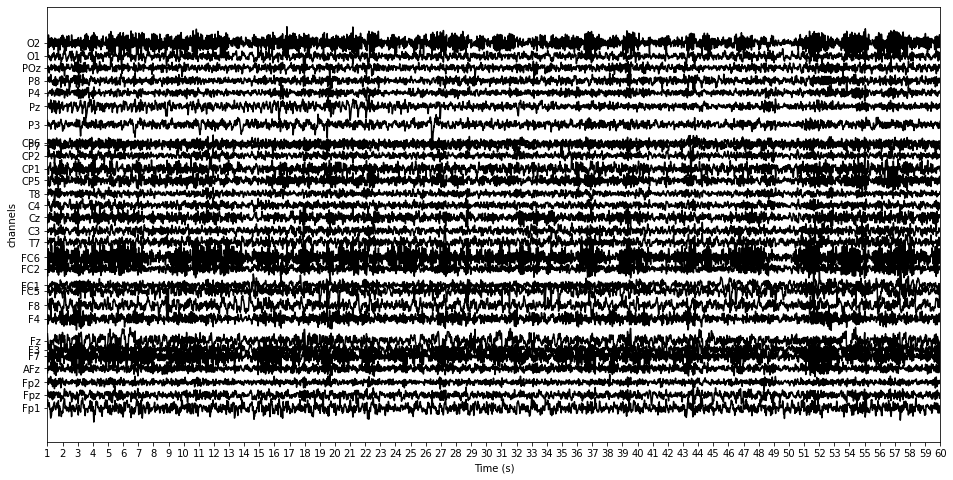

In [43]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_8_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [44]:
sujeto_8_2 = pd.read_csv(dirname+'suj_8_bl_2.txt', sep=',', header=None)

EEG_sujeto_8_2 = sujeto_8_2.to_numpy()
srate=128
ch    = EEG_sujeto_8_2.shape[0]
samples = EEG_sujeto_8_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_8_2.shape[1], EEG_sujeto_8_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


Visualizo la serie temporal con todos los canales

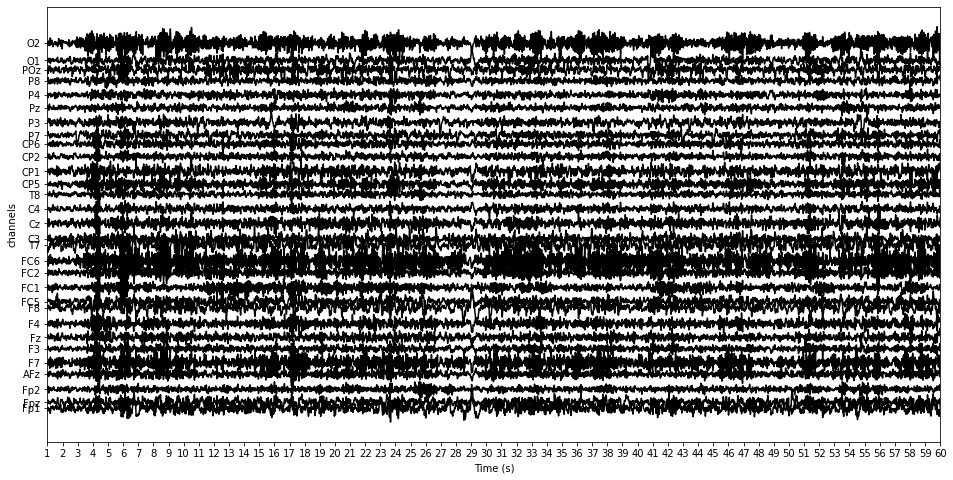

In [45]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_8_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 9

### Cargo bl1

In [46]:
sujeto_9_1 = pd.read_csv(dirname+'suj_9_bl_1.txt', sep=',', header=None)

EEG_sujeto_9_1 = sujeto_9_1.to_numpy()
srate=128
ch    = EEG_sujeto_9_1.shape[0]
samples = EEG_sujeto_9_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_9_1.shape[1], EEG_sujeto_9_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


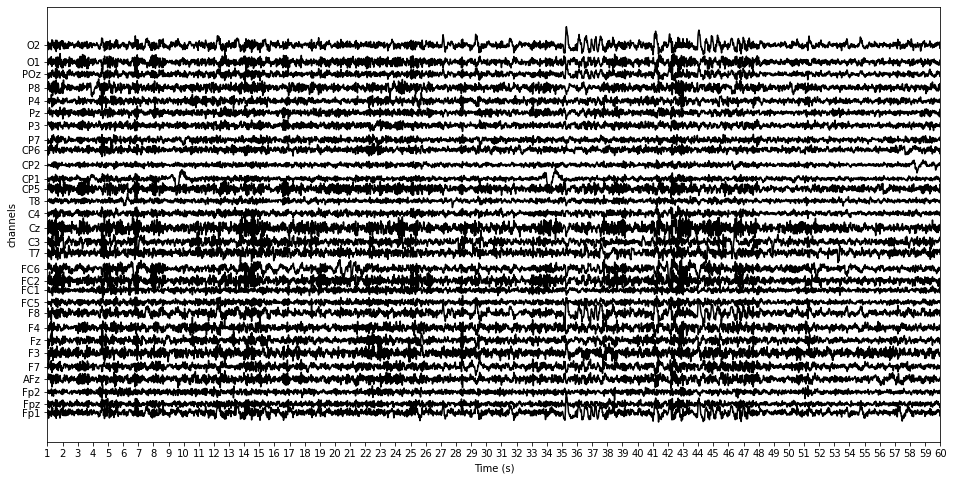

In [47]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_9_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [48]:
sujeto_9_2 = pd.read_csv(dirname+'suj_9_bl_2.txt', sep=',', header=None)

EEG_sujeto_9_2 = sujeto_9_2.to_numpy()
srate=128
ch    = EEG_sujeto_9_2.shape[0]
samples = EEG_sujeto_9_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_9_2.shape[1], EEG_sujeto_9_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


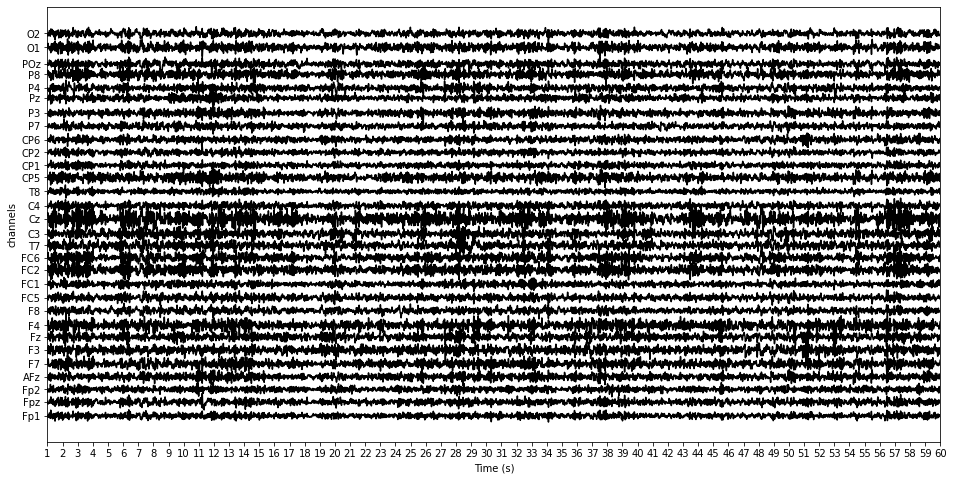

In [49]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_9_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 10

### Cargo bl1

In [50]:
sujeto_10_1 = pd.read_csv(dirname+'suj_10_bl_1.txt', sep=',', header=None)

EEG_sujeto_10_1 = sujeto_10_1.to_numpy()
srate=128
ch    = EEG_sujeto_10_1.shape[0]
samples = EEG_sujeto_10_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_10_1.shape[1], EEG_sujeto_10_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


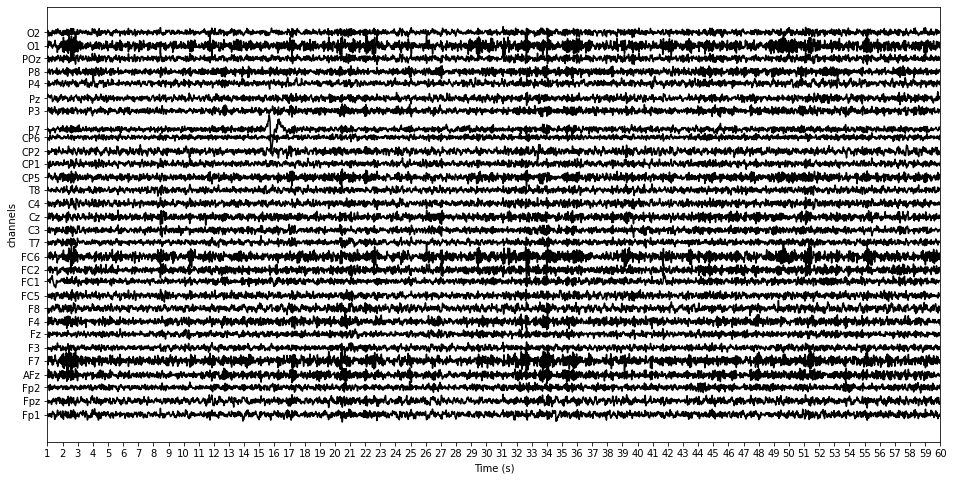

In [51]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_10_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [52]:
sujeto_10_2 = pd.read_csv(dirname+'suj_10_bl_2.txt', sep=',', header=None)

EEG_sujeto_10_2 = sujeto_10_2.to_numpy()
srate=128
ch    = EEG_sujeto_10_2.shape[0]
samples = EEG_sujeto_10_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_10_2.shape[1], EEG_sujeto_10_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


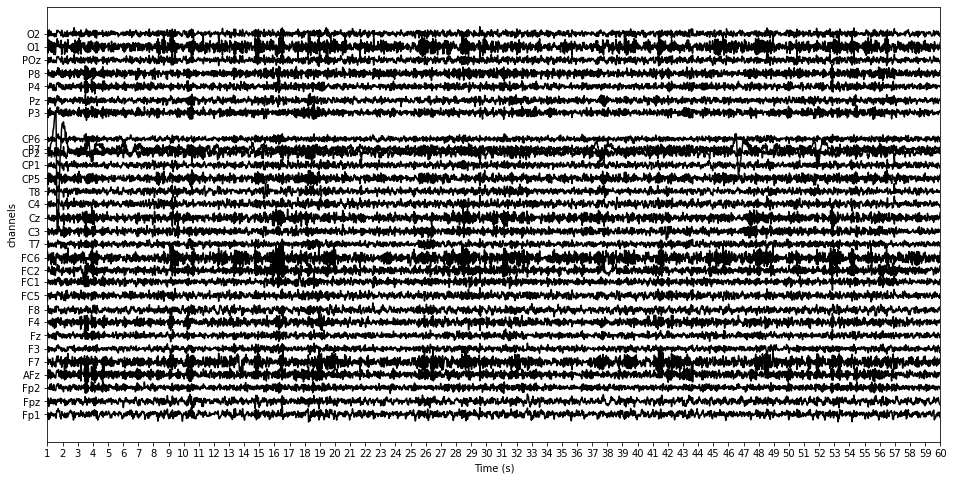

In [53]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_10_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 12

### Cargo bl1

In [54]:
sujeto_12_1 = pd.read_csv(dirname+'suj_12_bl_1.txt', sep=',', header=None)

EEG_sujeto_12_1 = sujeto_12_1.to_numpy()
srate=128
ch    = EEG_sujeto_12_1.shape[0]
samples = EEG_sujeto_12_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_12_1.shape[1], EEG_sujeto_12_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


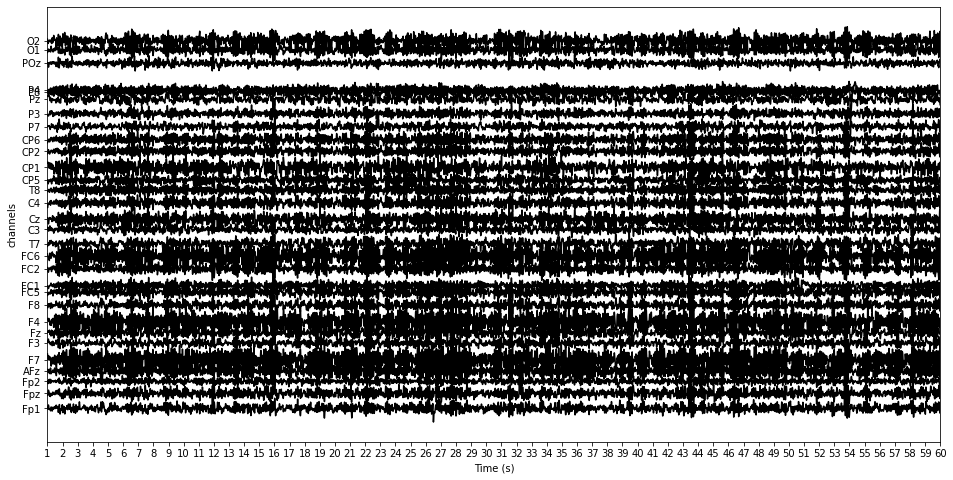

In [55]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_12_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [56]:
sujeto_12_2 = pd.read_csv(dirname+'suj_12_bl_2.txt', sep=',', header=None)

EEG_sujeto_12_2 = sujeto_12_2.to_numpy()
srate=128
ch    = EEG_sujeto_12_2.shape[0]
samples = EEG_sujeto_12_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_12_2.shape[1], EEG_sujeto_12_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


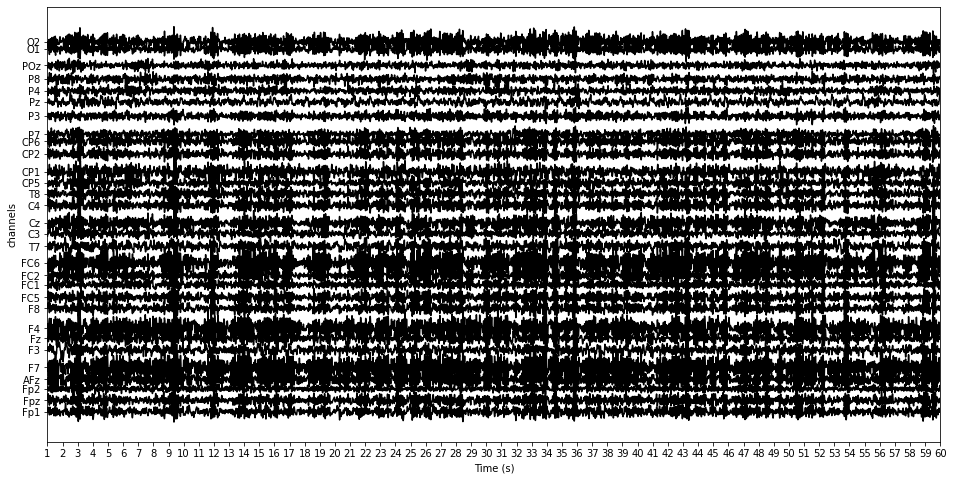

In [57]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_12_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 13

### Cargo bl1

In [58]:
sujeto_13_1 = pd.read_csv(dirname+'suj_13_bl_1.txt', sep=',', header=None)

EEG_sujeto_13_1 = sujeto_13_1.to_numpy()
srate=128
ch    = EEG_sujeto_13_1.shape[0]
samples = EEG_sujeto_13_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_13_1.shape[1], EEG_sujeto_13_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


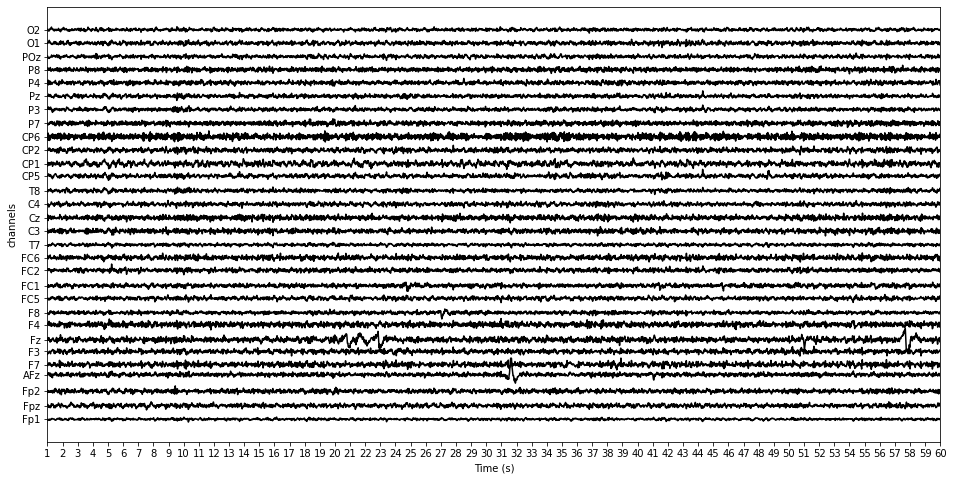

In [59]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_13_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [60]:
sujeto_13_2 = pd.read_csv(dirname+'suj_13_bl_2.txt', sep=',', header=None)

EEG_sujeto_13_2 = sujeto_13_2.to_numpy()
srate=128
ch    = EEG_sujeto_13_2.shape[0]
samples = EEG_sujeto_13_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_13_2.shape[1], EEG_sujeto_13_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


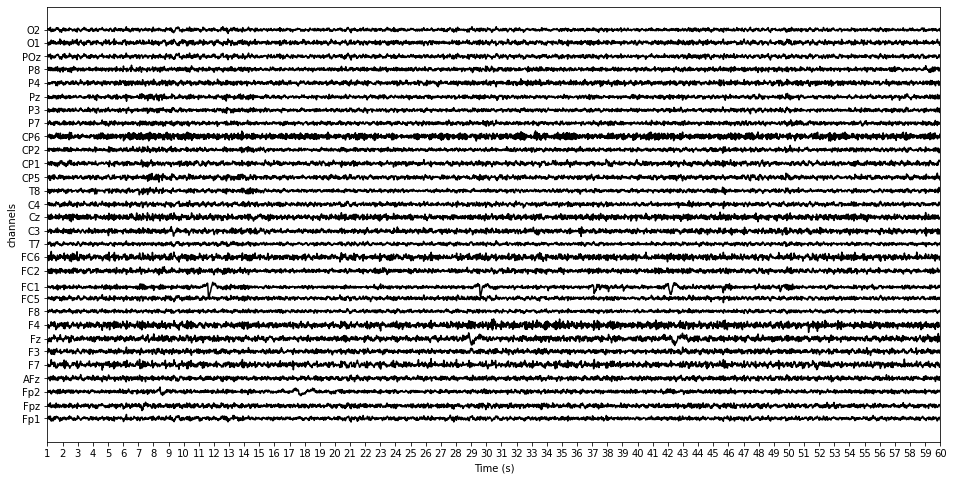

In [61]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_13_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

# 2) Promedios de topografía

### *Graficar los promedios de la topografía para cada participante. ¿Hay diferencias entre los dos períodos de reposo?*

In [62]:
#Creo un dataframe con los canales y los promedios de cada canal para cada sujeto en el período 1 (mean1) y en el 2 (mean2)

promedios=pd.DataFrame()
promedios['ch_names'] = mont1020_30.ch_names
promedios['sujeto8_mean1'] = sujeto_8_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto8_mean2'] = sujeto_8_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto9_mean1'] = sujeto_9_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto9_mean2'] = sujeto_9_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto10_mean1'] = sujeto_10_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto10_mean2'] = sujeto_10_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto12_mean1'] = sujeto_12_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto12_mean2'] = sujeto_12_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto13_mean1'] = sujeto_13_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto13_mean2'] = sujeto_13_2.iloc[:, 1:].mean(axis=1)

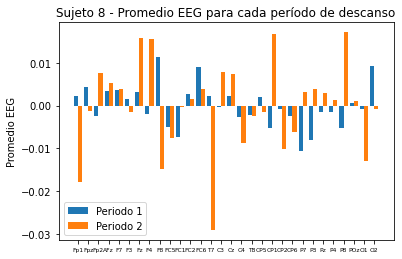

In [63]:
# Grafico promedios

fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto8_mean1'].to_list()
periodo2= promedios['sujeto8_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 8 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()


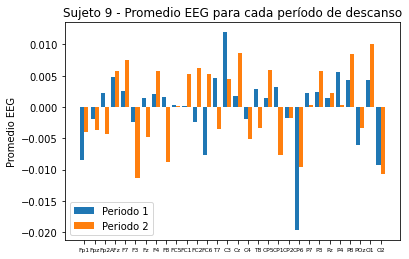

In [64]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto9_mean1'].to_list()
periodo2= promedios['sujeto9_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 9 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()


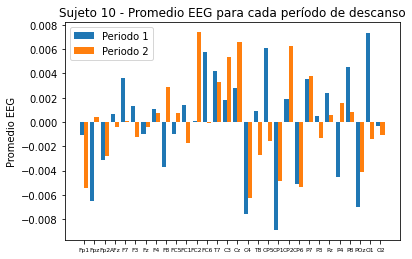

In [65]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto10_mean1'].to_list()
periodo2= promedios['sujeto10_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 10 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()

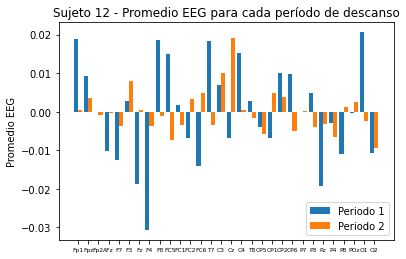

In [66]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto12_mean1'].to_list()
periodo2= promedios['sujeto12_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 12 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()

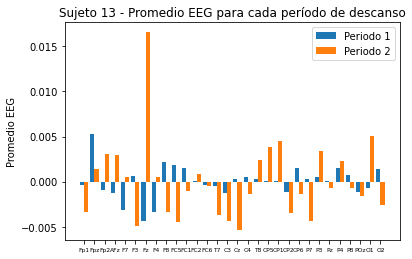

In [67]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto13_mean1'].to_list()
periodo2= promedios['sujeto13_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 13 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()

# 3) Análisis de Componentes Principales
### *Calcular las componentes principales para el total de los datos (concatenados en el tiempo). ¿Qué peso tiene cada proyección en los distintos períodos de reposo?*

In [68]:
# Cargo PCA de Scikit Learn y utilizo fit_transform sobre el sujeto

pca = decomposition.PCA(n_components=3)

# Creo base concatenada

dataconcat = pd.DataFrame()
dataconcat = pd.concat([sujeto_8_1, sujeto_8_2, sujeto_9_1, sujeto_9_2,
                     sujeto_10_1, sujeto_10_2,sujeto_12_1, sujeto_12_2,
                     sujeto_13_1, sujeto_13_2], axis=1, ignore_index=True)

pca.fit(dataconcat)
componentes= pca.transform(dataconcat)

variabilidad=pca.explained_variance_ratio_

# Reviso la variabilidad explicada
print("Analisis de variabilidad explicada=",variabilidad)

# Grafico de Topologias con sus principales componentes

fig2, ax = plt.subplots(ncols=componentes.shape[1], figsize=(10, 3), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)
for p in range(componentes.shape[1]):
    mne.viz.plot_topomap(componentes[:,p],
                    info_eeg,
                    cmap='coolwarm', contours=0,
                    axes=ax[p],show=False)
    ax[p].set_title('var:'+str(round(variabilidad[p]*100,2)) ) 


In [33]:
# Concateno ambas mediciones del sujeto
#sujeto_8_completo= pd.concat([sujeto_8_1,sujeto_8_2],axis=1)

# Cargo PCA de Scikit Learn y utilizo fit_transform sobre el sujeto
#pca = decomposition.PCA(n_components=4)
#pca.fit(sujeto_8_completo)
#componentes_sj_8 = pca.transform(sujeto_8_completo)

#variabilidad=pca.explained_variance_ratio_

# Reviso la variabilidad explicada
#print("Analisis de variabilidad explicada=",variabilidad)

# Grafico de Topologias para el Sujeto completo con sus principales componentes
#fig2, ax = plt.subplots(ncols=componentes_sj_8.shape[1], figsize=(10, 3), gridspec_kw=dict(top=0.9),
#                       sharex=True, sharey=True)
#fig2.suptitle('Sujeto 8 - Análisis de componentes principales')
#for p in range(componentes_sj_8.shape[1]):
#    mne.viz.plot_topomap(componentes_sj_8[:,p],
#                    info_eeg,
#                    cmap='coolwarm', contours=0,
#                    axes=ax[p],show=False)
#    ax[p].set_title('var:'+str(round(variabilidad[p]*100,2)) ) 

#4) Promedio por sample

### Referenciar los datos al promedio por sample. 

In [ ]:
# Defino funcion para referenciar los datos al promedio


def referenciar(eea):
  eea_ref_prom = eea
  promedios_samples = eea.mean(axis=0)
  eea_ref_prom= eea_ref_prom.sub(promedios_samples, axis=0) 
  return(eea_ref_prom)
#  print(promedios_samples)

dataconcat2 = referenciar(dataconcat)





In [34]:
# Genero datasets referenciados al promedio

sujeto_8_1_ref_prom = referenciar(sujeto_8_1)
sujeto_8_2_ref_prom = referenciar(sujeto_8_2)

sujeto_9_1_ref_prom = referenciar(sujeto_9_1)
sujeto_9_2_ref_prom = referenciar(sujeto_9_2)

sujeto_10_1_ref_prom = referenciar(sujeto_10_1)
sujeto_10_2_ref_prom = referenciar(sujeto_10_2)

sujeto_12_1_ref_prom = referenciar(sujeto_12_1)
sujeto_12_2_ref_prom = referenciar(sujeto_12_2)

sujeto_13_1_ref_prom = referenciar(sujeto_13_1)
sujeto_13_2_ref_prom = referenciar(sujeto_13_2)

# 5) Calculo de GFP

### *Calcular el Campo de Potencia Global (GFP). Encontrar los picos del GFP. Guardar los vectores del GFP para los máximos encontrados.*

In [35]:
# Defino función para el cálculo del GFP

def gfp(eea):
  gfp=[]
  for i in range(len(eea.columns)): #itero por la cantidad de columna 
    gfp.append(round(math.sqrt(np.power(eea[i],2).sum()/30),2)) #Hago el calculo y guardo en lista
  return(gfp)

# Defino función para el cálulo de los picos (posiciones y valores)

def picos(gfp):
  peaks, _ = find_peaks(gfp, distance=60, rel_height=0.5)       #peaks indica las posiciones de los picos
  gfp_peaks=[gfp[i] for i in peaks]                             #gfp_peaks indica los valores de los picos
  return(peaks, gfp_peaks)

# Defino función para graficar el GFP con marcas en los picos

def graficopicos(gfp, peaks, gfp_peaks, titulo):
  plt.rcParams['figure.figsize'] = [14, 4]
  plt.plot(gfp)
  plt.xlim(0, len(gfp))
  plt.ylabel("GFP - " + titulo)
  plt.scatter(peaks, gfp_peaks, c='r', label='Picos')
  plt.show()



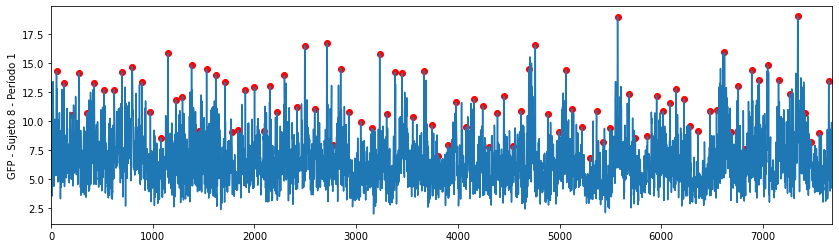

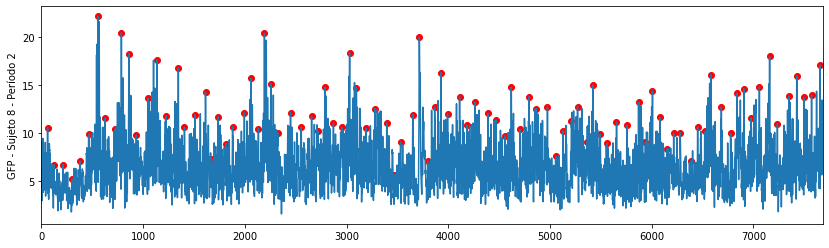

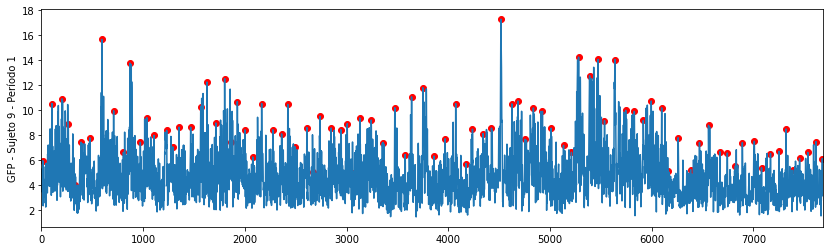

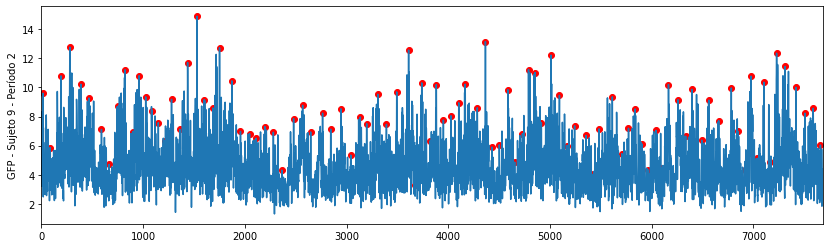

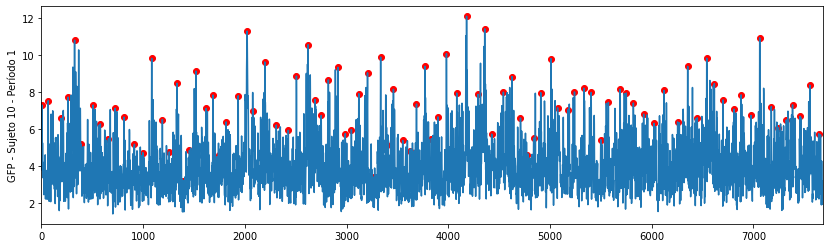

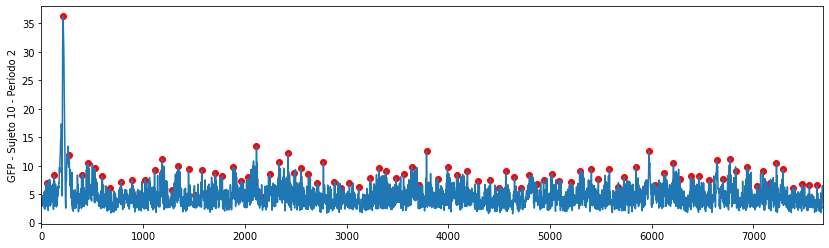

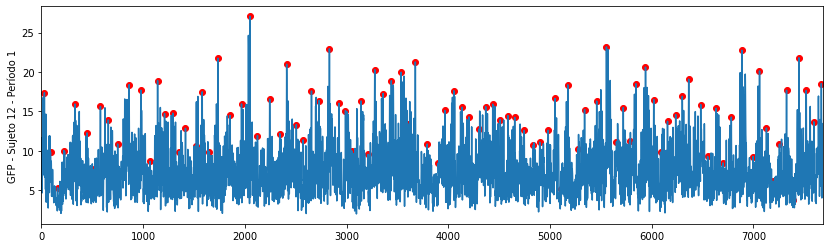

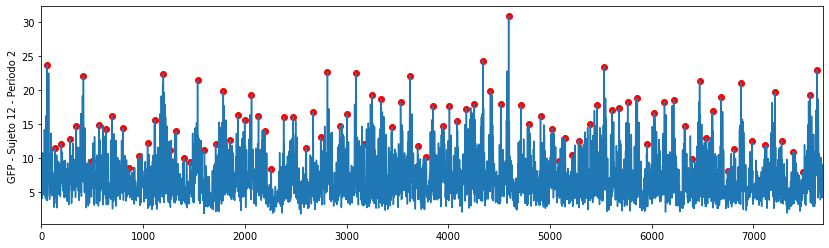

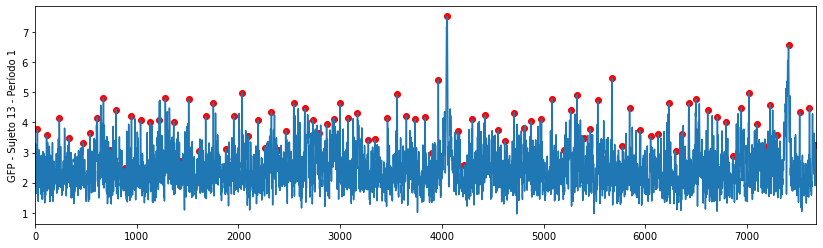

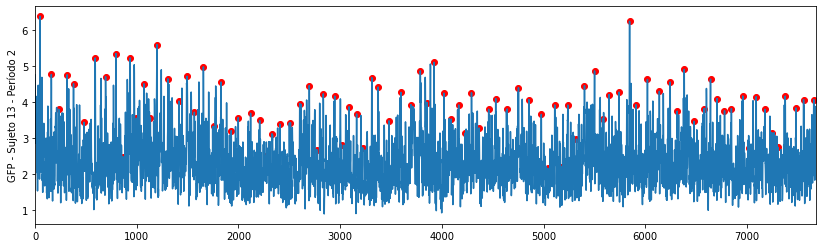

In [36]:
#Aplico función para el cáclulo del GFP, luego la función de los picos y por último la función para graficar
gfp_sujeto_8_1= gfp(sujeto_8_1)
peaks, gfp_peaks= picos(gfp_sujeto_8_1)
graficopicos(gfp_sujeto_8_1, peaks, gfp_peaks, "Sujeto 8 - Período 1")
gfp_sujeto_8_2= gfp(sujeto_8_2)
peaks, gfp_peaks= picos(gfp_sujeto_8_2)
graficopicos(gfp_sujeto_8_2, peaks, gfp_peaks, "Sujeto 8 - Período 2")

gfp_sujeto_9_1= gfp(sujeto_9_1)
peaks, gfp_peaks= picos(gfp_sujeto_9_1)
graficopicos(gfp_sujeto_9_1, peaks, gfp_peaks, "Sujeto 9 - Período 1")
gfp_sujeto_9_2= gfp(sujeto_9_2)
peaks, gfp_peaks= picos(gfp_sujeto_9_2)
graficopicos(gfp_sujeto_9_2, peaks, gfp_peaks, "Sujeto 9 - Período 2")

gfp_sujeto_10_1= gfp(sujeto_10_1)
peaks, gfp_peaks= picos(gfp_sujeto_10_1)
graficopicos(gfp_sujeto_10_1, peaks, gfp_peaks, "Sujeto 10 - Período 1")
gfp_sujeto_10_2= gfp(sujeto_10_2)
peaks, gfp_peaks= picos(gfp_sujeto_10_2)
graficopicos(gfp_sujeto_10_2, peaks, gfp_peaks, "Sujeto 10 - Período 2")

gfp_sujeto_12_1= gfp(sujeto_12_1)
peaks, gfp_peaks= picos(gfp_sujeto_12_1)
graficopicos(gfp_sujeto_12_1, peaks, gfp_peaks, "Sujeto 12 - Período 1")
gfp_sujeto_12_2= gfp(sujeto_12_2)
peaks, gfp_peaks= picos(gfp_sujeto_12_2)
graficopicos(gfp_sujeto_12_2, peaks, gfp_peaks, "Sujeto 12 - Período 2")

gfp_sujeto_13_1= gfp(sujeto_13_1)
peaks, gfp_peaks= picos(gfp_sujeto_13_1)
graficopicos(gfp_sujeto_13_1, peaks, gfp_peaks, "Sujeto 13 - Período 1")
gfp_sujeto_13_2= gfp(sujeto_13_2)
peaks, gfp_peaks= picos(gfp_sujeto_13_2)
graficopicos(gfp_sujeto_13_2, peaks, gfp_peaks, "Sujeto 13 - Período 2")